# Frequency folding
## The relationship between the Fourier transform of a function and the Fourier transform of its sampled function
Consider the function $f(t)$. The function is sampled with the sampling period $h$ (correspoding to sampling frequency $\omega_s = \frac{2\pi}{h}$) to obtain the sequence $f(kh)$. 
If $F(\omega)$ is the Fourier transform of the function $f(t)$ and $F_s(\omega)$ is the Fourier transform of the sampled signal $f(kh)$, then
\begin{equation}
F_s(\omega) = \frac{1}{h} \sum_{k=-\infty}^{\infty} F(\omega + k\omega_s)
\end{equation}

From this we see that the spectrum of a sampled signal is periodic, since the function $F_s(\omega)$ is periodic with period $\omega_s$, i.e.
\begin{equation}
F_s(\omega + m\omega_s) = \frac{1}{h} \sum_{k=-\infty}^{\infty} F(\omega + k\omega_s + m\omega_s) = \frac{1}{h} \sum_{k=-\infty}^{\infty} F(\omega + (k+m)\omega_s) = F_s(\omega)
\end{equation}

We also see that the power of the signal $f(kh)$ at a frequency $\omega_1$, $0 \le \omega \le \omega_N$ contains contributions from all frequencies of the original signal at the frequencies 
\begin{equation}
\omega = \omega_1 + k\omega_s, \; k=-\infty, \ldots, 0, \ldots, \infty 
\end{equation}
and
\begin{equation}
\omega = -\omega_1 + k\omega_s, \; k=-\infty, \ldots, 0, \ldots, \infty 
\end{equation}
We say that $\omega_1$ is the alias of all these frequencies. The lowest such alias frequency is the frequency
\begin{equation}
\omega = -\omega_1 + \omega_s,
\end{equation}
which can be written
\begin{equation}
\omega = |\omega_1 - \omega_s| = | \omega_1 + \omega_N - \omega_N - \omega_s | = | (\omega_a + \omega_N) - \omega_s - \omega_N| = | (\omega_1 + \omega_N)\, \mathrm{mod}\, \omega_s - \omega_N|.
\end{equation}

<IPython.core.display.Javascript object>


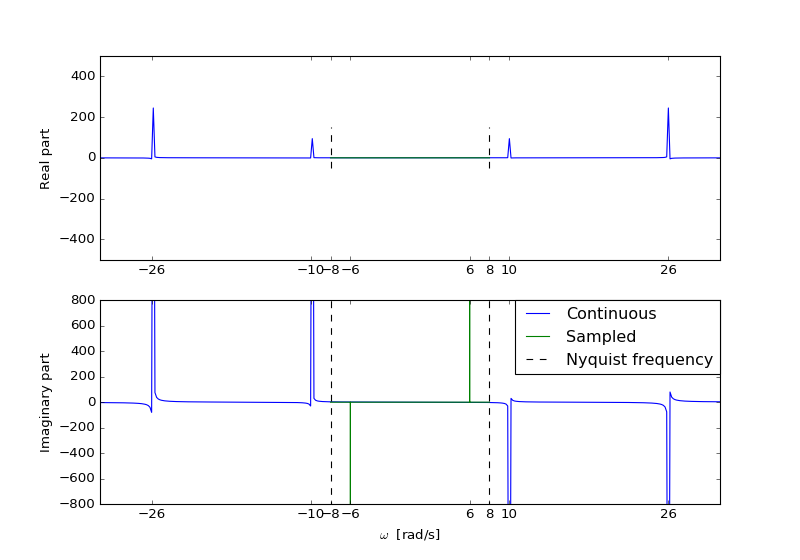

In [43]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def spectrum(x,h):
    """ Computes spectrum using np.fft.fft  Returns frequency in rad/s from -\omega_N to \omega_N"""
    wN = np.pi/h # The Nyquist frequency
    N = len(x)
    X = np.fft.fft(x) # Computes the Fourier transform
    Xpos = X[:N/2] # Positive part of the spectrum
    Xneg = X[N/2:] # Negative part. Obs: for frequencies wN up to ws
    wpos = np.linspace(0, wN, N/2) # Positive frequencies, goes from 0 to wN

    W = np.hstack((-wpos[::-1], wpos))
    XX = np.hstack((Xneg, Xpos))
    
    return (XX, W)

# Assume too slow sampling of signal consisting of two high-frequency sinusoids
ws = 16 # Sampling frequency in rad/s
wN = ws/2
h = np.pi/wN

w1 = 10 # rad/s
w2 = w1+1*ws # rad/s

w1Alias = np.abs( (w1+wN) % ws - wN )
w2Alias = np.abs( (w1+wN) % ws - wN )

M = 800 # Number of samples in the over-sampled ("continuous") signal 
t = np.linspace(0, 60*2*np.pi/w1, M) # 60 periods of the slowest sinusoid
y = np.sin(w1*t) + np.sin(w2*t) # Continuous time (sort of) signal


N = 4000 # Number of samples to take 
ts = np.arange(N)*h
ys = np.sin(w1*ts) + np.sin(w2*ts) # Sampled signal

(Y,W) = spectrum(y,t[1]-t[0]) # get spectrum (from FFT) of the "continuous" signal
(Ys, Ws) = spectrum(ys, h) # Spectrum of discrete signal

plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(W, np.real(Y))
plt.plot(Ws, np.real(Ys))
plt.plot([wN, wN], [-50, 150], 'k--')
plt.plot([-wN, -wN], [-50, 150], 'k--')
plt.xlim((-1.2*w2, 1.2*w2))
plt.xticks((-w2, -w1, -wN, -w1Alias, w1Alias, wN, w1, w2))
plt.ylim((-500, 500))
plt.ylabel('Real part')
plt.subplot(2,1,2)
plt.plot(W, np.imag(Y))
plt.plot(Ws, np.imag(Ys))
plt.plot([wN, wN], [-1500, 1500], 'k--')
plt.plot([-wN, -wN], [-1500, 1500], 'k--')
plt.xlim((-1.2*w2, 1.2*w2))
plt.xticks((-w2, -w1, -wN, -w1Alias, w1Alias, wN, w1, w2))

plt.ylim((-800, 800))
#plt.xticks((-10, -5, -1, 0, 1, 5, 10))
plt.ylabel('Imaginary part')
plt.xlabel(r'$\omega$  [rad/s]')

plt.legend(('Continuous', 'Sampled', 'Nyquist frequency'), loc=1, borderaxespad=0.)


<IPython.core.display.Javascript object>


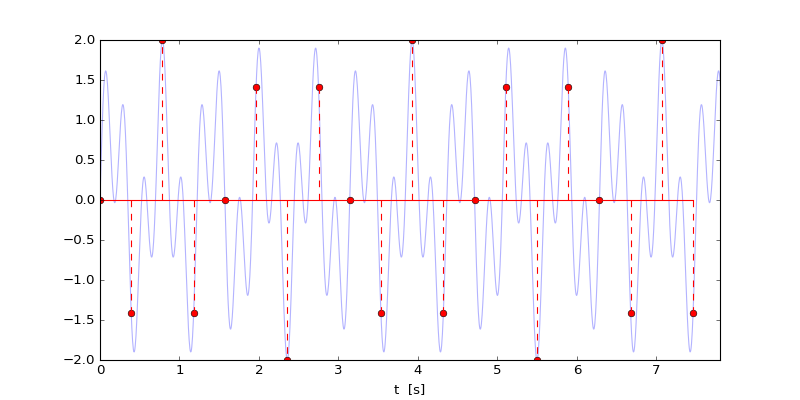

In [56]:
plt.figure(figsize=(10,5))
plt.plot(t,y, color=(0.7,0.7,1))
plt.stem(ts[:20], ys[:20],linefmt='r--', markerfmt='ro', basefmt = 'r-')
plt.xlim((0,7.8))
plt.xlabel('t  [s]')